 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Reading whale returns
wh_ret_df = pd.read_csv(Path('../Starter_Code/Resources/whale_returns.csv') , infer_datetime_format= True , parse_dates= True)
wh_ret_df.set_index('Date', inplace= True)
wh_ret_df.index = pd.to_datetime(wh_ret_df.index)
wh_ret_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Reading algo returns
algo_ret_df = pd.read_csv(Path('../Starter_Code/Resources/algo_returns.csv') , infer_datetime_format= True , parse_dates= True)
algo_ret_df.set_index('Date', inplace= True)
algo_ret_df.index = pd.to_datetime(algo_ret_df.index)
algo_ret_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [4]:
# Reading S&P TSX 60
sp_tsx_df = pd.read_csv(Path('../Starter_Code/Resources/sp_tsx_history.csv') , infer_datetime_format= True , parse_dates= True)
sp_tsx_df.set_index('Date', inplace= True)
sp_tsx_df.index = pd.to_datetime(sp_tsx_df.index)
sp_tsx_df.sort_index(ascending= True, inplace= True)
sp_tsx_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [75]:
# Count nulls
# whale returns
wh_ret_df.isnull().sum()


SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# algo returns
algo_ret_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# S&P TSX 60
sp_tsx_df.isnull().sum()

Close    0
dtype: int64

In [8]:
# Drop nulls
# whale returns
wh_ret_df.dropna()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [9]:
# algo returns
algo_ret_df.dropna()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [10]:
# Reading algorithmic returns
# whale returns
wh_ret_df.pct_change()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,-2.762070,-1.650792,4.113646,-1.641381
2015-03-05,0.800968,0.257544,-1.929234,0.596558
2015-03-06,-2.968465,-1.876837,-4.601872,-2.947282
...,...,...,...,...
2019-04-25,-1.124733,-2.279801,0.288325,-1.759149
2019-04-26,-29.607053,-8.097525,-3.397536,1.152302
2019-04-29,-0.846082,-0.703202,-0.494071,-0.499394


In [11]:
# algo returns
algo_ret_df.pct_change()

,Algo 1,Algo 2
Date,,
2014-05-28,NaN,NaN
2014-05-29,1.280156,NaN
2014-05-30,0.122192,NaN
2014-06-02,0.275137,NaN
2014-06-03,-0.070296,NaN
...,...,...
2019-04-25,-0.376856,-19.155605
2019-04-26,3.368191,-1.725170
2019-04-29,0.746958,-0.461657


In [12]:
# Count nulls
wh_ret_df.isnull().sum()
algo_ret_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [14]:
#Drop nulls
wh_ret_df.dropna(inplace=True)
algo_ret_df.dropna(inplace=True)

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [16]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_df.head(-4)

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-16,"$17,056.36"
2019-12-17,"$17,075.20"
2019-12-18,"$17,031.98"


In [17]:
# Check Data Types
sp_tsx_df.dtypes

Close    object
dtype: object

In [18]:
# Fix Data Types
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$' , '')
sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace(',' , '')
sp_tsx_df.head()

/var/folders/_7/ybbvq0j97q3_dzl8ghcj2jmr0000gn/T/ipykernel_1111/836204205.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp_tsx_df['Close'] = sp_tsx_df['Close'].str.replace('$' , '')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [19]:
# change data type to float
sp_tsx_df['Close'] = sp_tsx_df['Close'].astype(float)
sp_tsx_df.head()

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99


In [20]:
# Calculate Daily Returns
sp_returns_df = sp_tsx_df.pct_change()
sp_returns_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [21]:
# Drop nulls
sp_returns_df.dropna(inplace=True)
sp_returns_df.head()

,Close
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


In [22]:
# Rename `Close` Column to be specific to this portfolio.
sp_returns_df = sp_returns_df.rename(columns={
    'Close' : 'S&P TSX'

})




## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [23]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([wh_ret_df , algo_ret_df, sp_returns_df ] , axis='columns' , join= 'inner')
combined_df.sort_index(ascending=True, inplace= True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

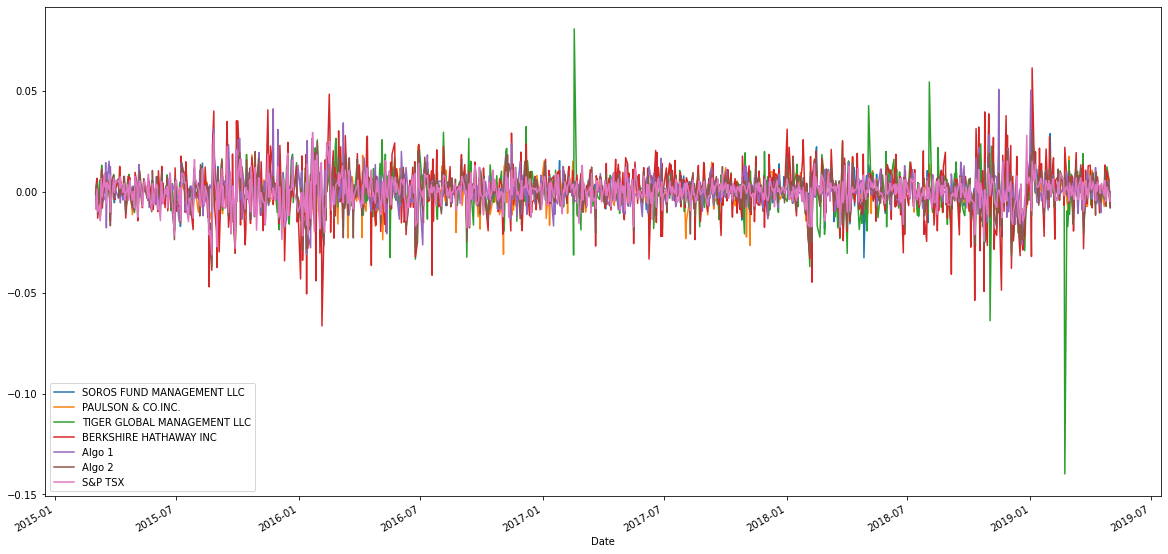

In [77]:
# Plot daily returns of all portfolios
combined_df.plot(figsize = (20,10))

#### Calculate and Plot cumulative returns.

In [28]:
# Calculate cumulative returns of all portfolios
daily_cum_ret = (1 + combined_df).cumprod()-1
daily_cum_ret.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,-0.011872
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,-0.010544
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,-0.020411
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,-0.026832


<AxesSubplot:xlabel='Date'>

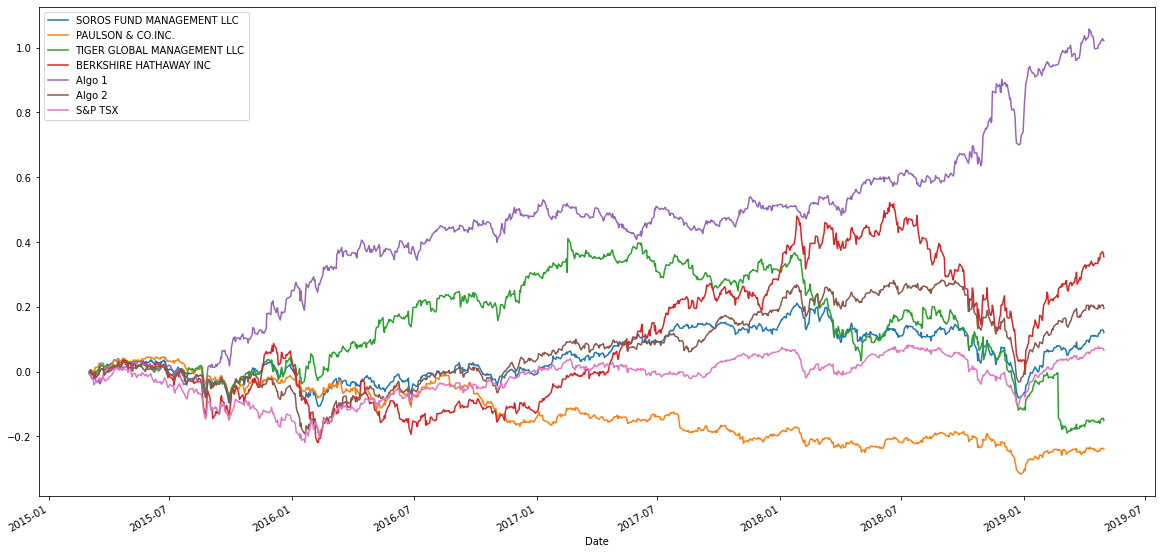

In [29]:
# Plot cumulative returns
daily_cum_ret.plot(figsize = (20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:>

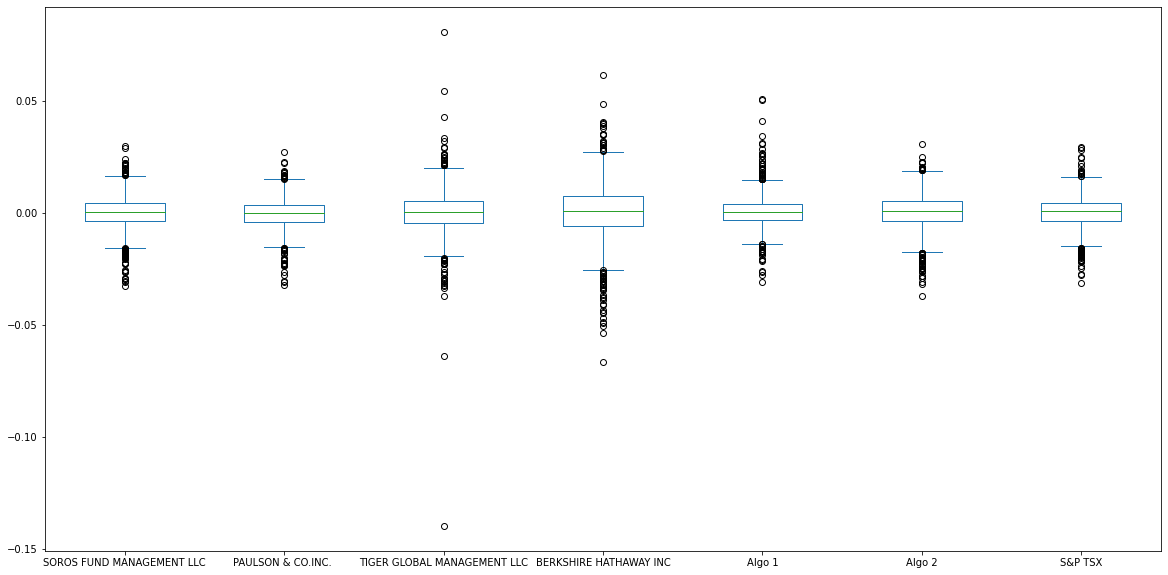

In [30]:
# Box plot to visually show risk
combined_df.plot(kind = 'box', figsize = (20,10))

### Calculate Standard Deviations

In [31]:
# Calculate the daily standard deviations of all portfolios
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0 : 'std'})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
PAULSON & CO.INC.,0.006982
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326
S&P TSX,0.007034


### Determine which portfolios are riskier than the S&P TSX 60

In [32]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std = combined_df_std[combined_df_std['std'] > combined_df_std.loc['S&P TSX', 'std']]
higher_std

,std
SOROS FUND MANAGEMENT LLC,0.007828
TIGER GLOBAL MANAGEMENT LLC,0.010883
BERKSHIRE HATHAWAY INC,0.012826
Algo 1,0.007589
Algo 2,0.008326


All of the portfolios except PAULSON & CO.INC. have higher std than S&P TSX 60 which means they have higher volitility and thus they are riskier than S&P TSX 60.

### Calculate the Annualized Standard Deviation

In [33]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_df_std*np.sqrt(252)
annual_std

,std
SOROS FUND MANAGEMENT LLC,0.124259
PAULSON & CO.INC.,0.110841
TIGER GLOBAL MANAGEMENT LLC,0.172759
BERKSHIRE HATHAWAY INC,0.203599
Algo 1,0.120470
Algo 2,0.132177
S&P TSX,0.111664


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

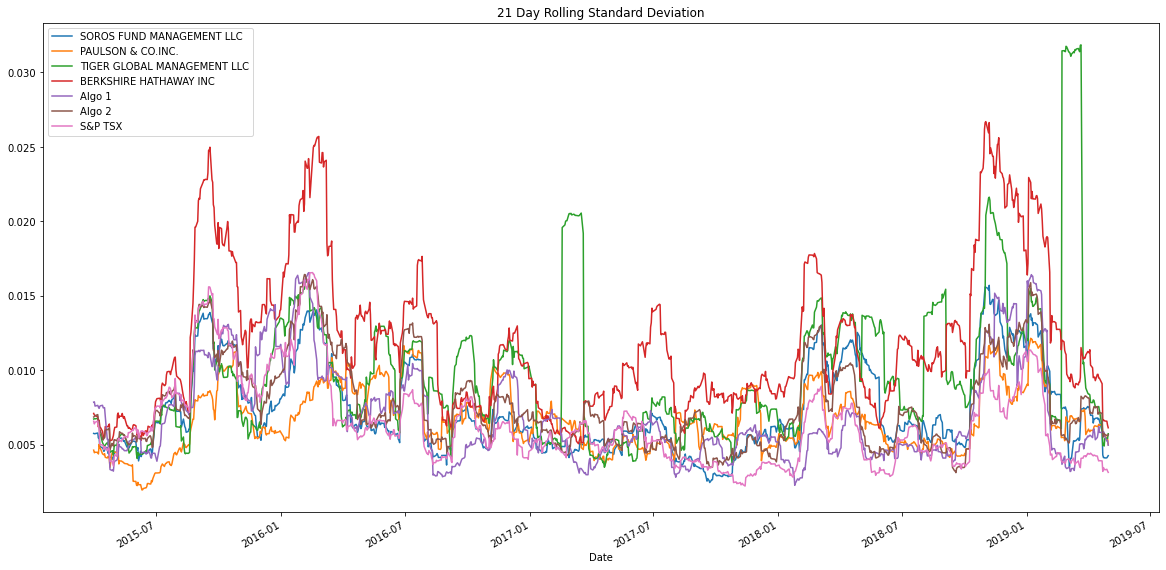

In [34]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_21 = combined_df.rolling(window= 21).std()

# Plot the rolling standard deviation
rolling_std_21.plot(figsize = (20,10), title= '21 Day Rolling Standard Deviation')

### Calculate and plot the correlation

In [35]:
# Calculate the correlation
correlation = combined_df.corr()
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

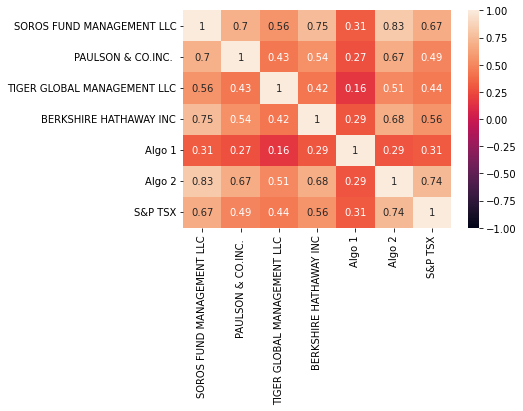

In [36]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1, annot= True )

<AxesSubplot:xlabel='S&P TSX', ylabel='Algo 2'>

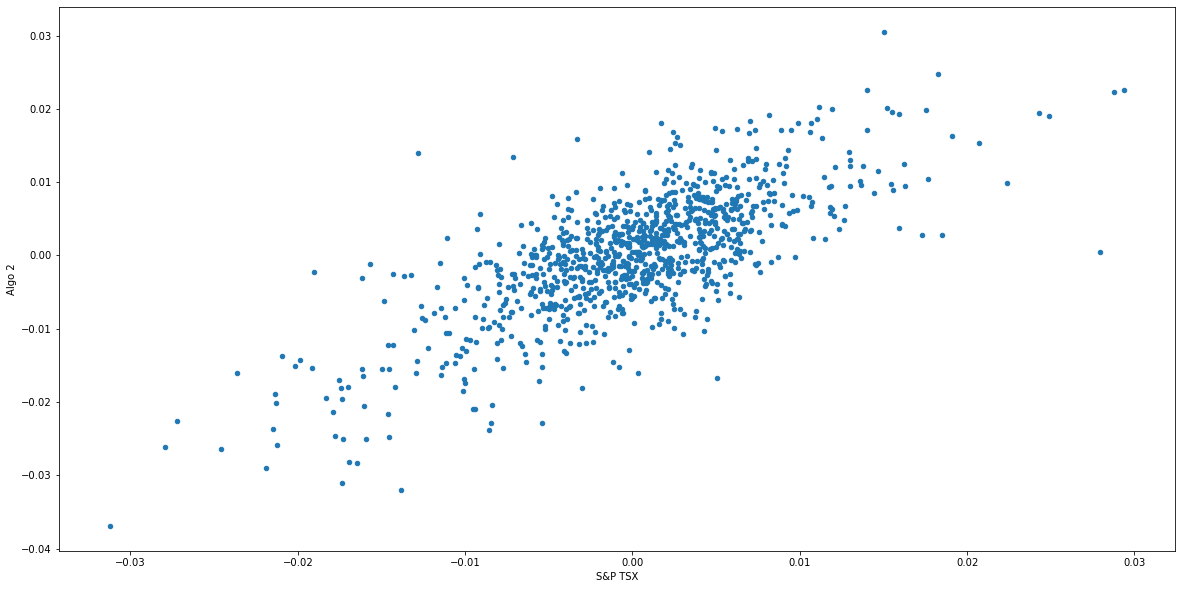

In [37]:
# scatter plot to show correlation
combined_df.plot(kind="scatter", y = "Algo 2", x = "S&P TSX", figsize = (20,10))

Algo 2 best mimic S&P TSX since it has the best correlation to S&P TSX, as visualized in chart above.

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [78]:
# Calculate covariance of a single portfolio
rolling_covariance = combined_df['Algo 2'].rolling(window= 60).cov(combined_df['S&P TSX'])
rolling_covariance 


Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Length: 1029, dtype: float64

In [39]:
# Calculate variance of S&P TSX
rolling_variance = combined_df['S&P TSX'].rolling(window=60).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [40]:
# Computing beta
beta = rolling_covariance /rolling_variance
beta

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.014041
2019-04-26    1.014918
2019-04-29    0.991566
2019-04-30    1.008943
2019-05-01    1.020958
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'Algo 2 Beta'}, xlabel='Date'>

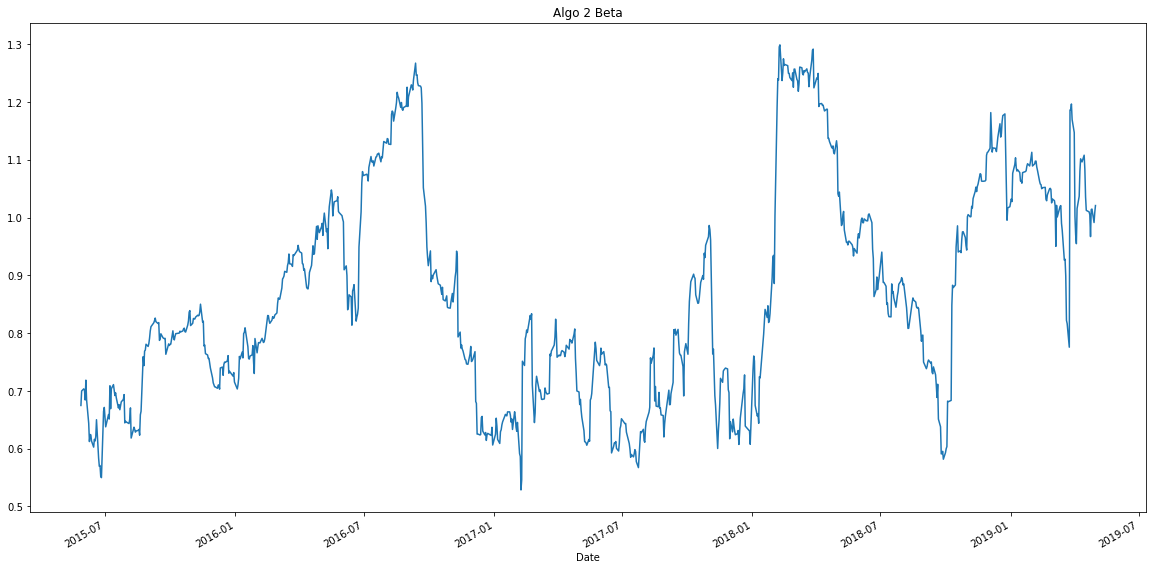

In [41]:
# Plot beta trend
beta.plot(figsize = (20,10) , title = 'Algo 2 Beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [42]:
# Use `ewm` to calculate the rolling window


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [43]:
# Annualized Sharpe Ratios
sharpe_ratios = combined_df.mean() * 252/ (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
S&P TSX                        0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

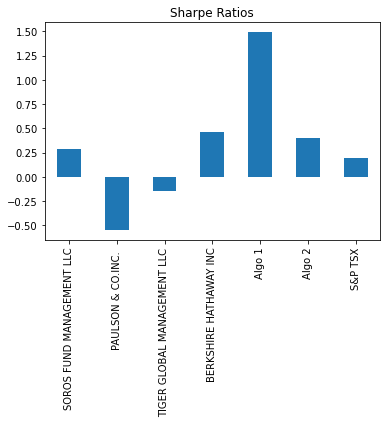

In [44]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind = 'bar', title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

We can see Algo 1 outperformed the market and whales while Algo 2 fell below BHI.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [49]:
# Reading data from 1st stock
tsla_df = pd.read_csv(Path('../Starter_Code/Resources/TSLA.csv') ,infer_datetime_format= True , parse_dates= True)
tsla_df.set_index('Date', inplace= True)
tsla_df.index = pd.to_datetime(tsla_df.index)
tsla_df.head()


,Close
Date,
2016-01-04 16:00:00,44.68
2016-01-05 16:00:00,44.69
2016-01-06 16:00:00,43.81
2016-01-07 16:00:00,43.13
2016-01-08 16:00:00,42.20


In [51]:
# Reading data from 2nd stock
amzn_df = pd.read_csv(Path('../Starter_Code/Resources/AMZN.csv') ,infer_datetime_format= True , parse_dates= True)
amzn_df.set_index('Date', inplace= True)
amzn_df.index = pd.to_datetime(amzn_df.index)
amzn_df.head()


,Close
Date,
2015-03-03 16:00:00,384.61
2015-03-04 16:00:00,382.72
2015-03-05 16:00:00,387.83
2015-03-06 16:00:00,380.09
2015-03-09 16:00:00,378.56


In [52]:
# Reading data from 3rd stock

nflx_df = pd.read_csv(Path('../Starter_Code/Resources/NFLX.csv') ,infer_datetime_format= True , parse_dates= True)
nflx_df.set_index('Date', inplace= True)
nflx_df.index = pd.to_datetime(nflx_df.index)
nflx_df.head()

,Close
Date,
2015-01-02 16:00:00,49.85
2015-01-05 16:00:00,47.31
2015-01-06 16:00:00,46.50
2015-01-07 16:00:00,46.74
2015-01-08 16:00:00,47.78


In [53]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat([tsla_df , amzn_df, nflx_df ] , axis='columns' , join= 'inner')
my_portfolio_df.head()

,Close,Close,Close
Date,,,
2016-01-04 16:00:00,44.68,636.99,109.96
2016-01-05 16:00:00,44.69,633.79,107.66
2016-01-06 16:00:00,43.81,632.65,117.68
2016-01-07 16:00:00,43.13,607.94,114.56
2016-01-08 16:00:00,42.20,607.05,111.39


In [54]:
# Reset Date index
my_portfolio_df.index = my_portfolio_df.index.normalize()

In [55]:
# Reorganize portfolio data by having a column per symbol
columns = ['TSLA', 'AMZN' , 'NFLX']
my_portfolio_df.columns = columns
my_portfolio_df.head()

,TSLA,AMZN,NFLX
Date,,,
2016-01-04,44.68,636.99,109.96
2016-01-05,44.69,633.79,107.66
2016-01-06,43.81,632.65,117.68
2016-01-07,43.13,607.94,114.56
2016-01-08,42.20,607.05,111.39


In [56]:
# Calculate daily returns
portfolio_returns = my_portfolio_df.pct_change()
# Drop NAs
portfolio_returns.dropna(inplace=True)
# Display sample data
portfolio_returns.head()

,TSLA,AMZN,NFLX
Date,,,
2016-01-05,0.000224,-0.005024,-0.020917
2016-01-06,-0.019691,-0.001799,0.093071
2016-01-07,-0.015522,-0.039058,-0.026513
2016-01-08,-0.021563,-0.001464,-0.027671
2016-01-11,-0.014929,0.017610,0.032139


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [57]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_weight = my_portfolio_df.dot(weights)
my_weight_ret = my_weight.pct_change()
my_weight_ret.dropna(inplace=True)

# Display sample data
my_weight_ret.head()

Date
2016-01-05   -0.006935
2016-01-06    0.010176
2016-01-07   -0.035900
2016-01-08   -0.006518
2016-01-11    0.017932
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [58]:
# Join your returns DataFrame to the original returns DataFrame
final_portfolio = pd.concat((my_weight_ret, combined_df), axis=1 , join= 'inner')
final_portfolio.rename(columns = {0 : 'my_portfolio'}, inplace= True)
final_portfolio.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2016-01-05,-0.006935,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542
2016-01-06,0.010176,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964
2016-01-07,-0.035900,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890
2016-01-08,-0.006518,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222
2016-01-11,0.017932,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140


In [59]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
final_portfolio.dropna(inplace=True)
final_portfolio.head()

,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,,
2016-01-05,-0.006935,-0.000398,0.002242,0.006798,-0.002960,0.009160,0.001770,-0.000542
2016-01-06,0.010176,-0.011558,-0.006955,-0.003349,0.017758,0.010346,-0.015503,-0.014964
2016-01-07,-0.035900,-0.020495,-0.007167,-0.021324,-0.033944,-0.000081,-0.029061,-0.021890
2016-01-08,-0.006518,-0.008149,-0.008307,-0.010071,-0.017585,-0.006897,-0.012941,-0.000222
2016-01-11,0.017932,-0.005272,-0.001480,0.011699,-0.003927,-0.007627,-0.018451,-0.010140


## Re-run the risk analysis with your portfolio to see how it compares to the others

<AxesSubplot:>

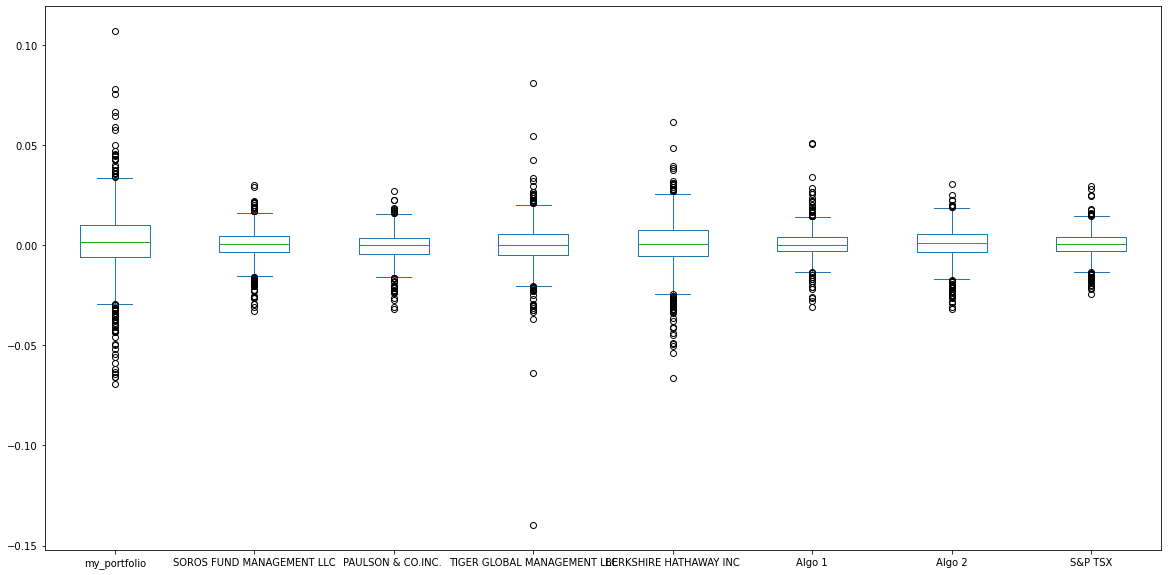

In [60]:
# Box plot to visually show risk
final_portfolio.plot(kind = 'box', figsize = (20,10))

In [61]:
# Calculate the daily standard deviations of all portfolios
final_portfolio_std = pd.DataFrame(final_portfolio.std()).rename(columns = {0 : 'std'})
final_portfolio_std

,std
my_portfolio,0.017459
SOROS FUND MANAGEMENT LLC,0.007779
PAULSON & CO.INC.,0.007213
TIGER GLOBAL MANAGEMENT LLC,0.011409
BERKSHIRE HATHAWAY INC,0.012755
Algo 1,0.007219
Algo 2,0.008215
S&P TSX,0.006374


In [62]:
# Determine which portfolios are riskier than the S&P TSX 60
higher_std2 = final_portfolio_std[final_portfolio_std['std'] > final_portfolio_std.loc['S&P TSX', 'std']]
higher_std2

,std
my_portfolio,0.017459
SOROS FUND MANAGEMENT LLC,0.007779
PAULSON & CO.INC.,0.007213
TIGER GLOBAL MANAGEMENT LLC,0.011409
BERKSHIRE HATHAWAY INC,0.012755
Algo 1,0.007219
Algo 2,0.008215


### Calculate the Annualized Standard Deviation

In [63]:
# Calculate the annualized `std`
annual_std2 = final_portfolio_std*np.sqrt(252)
annual_std2

,std
my_portfolio,0.277146
SOROS FUND MANAGEMENT LLC,0.123483
PAULSON & CO.INC.,0.114496
TIGER GLOBAL MANAGEMENT LLC,0.181113
BERKSHIRE HATHAWAY INC,0.202479
Algo 1,0.114591
Algo 2,0.130406
S&P TSX,0.101183


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:title={'center':'21 Day Rolling Standard Deviation'}, xlabel='Date'>

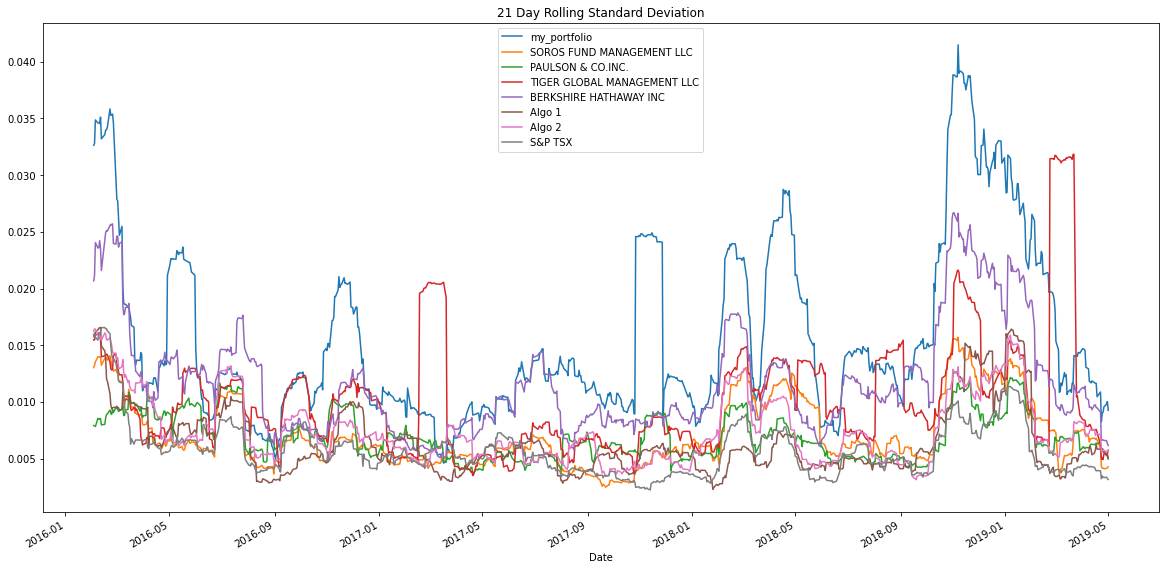

In [65]:
# Calculate the rolling standard deviation 
f_rolling_std_21 = final_portfolio.rolling( window = 21).std()


# Plot the rolling standard deviation
f_rolling_std_21.plot(figsize = (20,10), title= '21 Day Rolling Standard Deviation')


### Calculate and plot the correlation

In [66]:
# Calculate and plot the correlation
correlation2 = final_portfolio.corr()
correlation2


,my_portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
my_portfolio,1.000000,0.568713,0.407383,0.329732,0.699022,0.243749,0.538462,0.437268
SOROS FUND MANAGEMENT LLC,0.568713,1.000000,0.675280,0.511688,0.742767,0.276012,0.813684,0.643511
PAULSON & CO.INC.,0.407383,0.675280,1.000000,0.386762,0.514647,0.244223,0.668827,0.472591
TIGER GLOBAL MANAGEMENT LLC,0.329732,0.511688,0.386762,1.000000,0.374479,0.130586,0.451004,0.386343
BERKSHIRE HATHAWAY INC,0.699022,0.742767,0.514647,0.374479,1.000000,0.270871,0.676462,0.530771
Algo 1,0.243749,0.276012,0.244223,0.130586,0.270871,1.000000,0.266231,0.268766
Algo 2,0.538462,0.813684,0.668827,0.451004,0.676462,0.266231,1.000000,0.730126
S&P TSX,0.437268,0.643511,0.472591,0.386343,0.530771,0.268766,0.730126,1.000000


<AxesSubplot:>

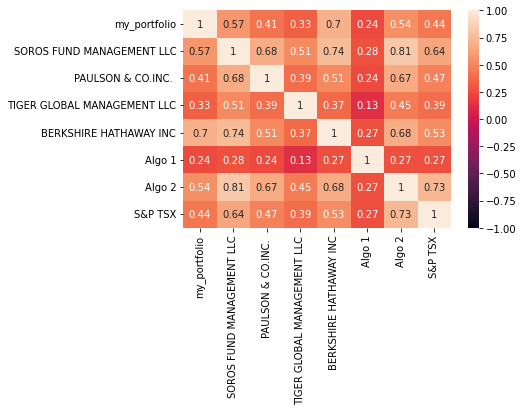

In [67]:
sns.heatmap(correlation2, vmin=-1, vmax=1, annot= True )

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [68]:
# Calculate and plot Beta
rolling_covariance2 = final_portfolio['my_portfolio'].rolling(window= 60).cov(final_portfolio['S&P TSX'])
rolling_covariance2 

Date
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
2016-01-11         NaN
                ...   
2019-04-25    0.000025
2019-04-26    0.000026
2019-04-29    0.000025
2019-04-30    0.000023
2019-05-01    0.000023
Length: 821, dtype: float64

In [71]:
# Calculate variance of S&P TSX
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    0.000015
2019-04-26    0.000015
2019-04-29    0.000015
2019-04-30    0.000015
2019-05-01    0.000015
Name: S&P TSX, Length: 1029, dtype: float64

In [72]:
# Computing beta
beta2 = rolling_covariance2 /rolling_variance
beta2

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-25    1.683875
2019-04-26    1.695892
2019-04-29    1.660679
2019-04-30    1.521860
2019-05-01    1.507812
Length: 1029, dtype: float64

<AxesSubplot:title={'center':'My Custom Portfolio Beta'}, xlabel='Date'>

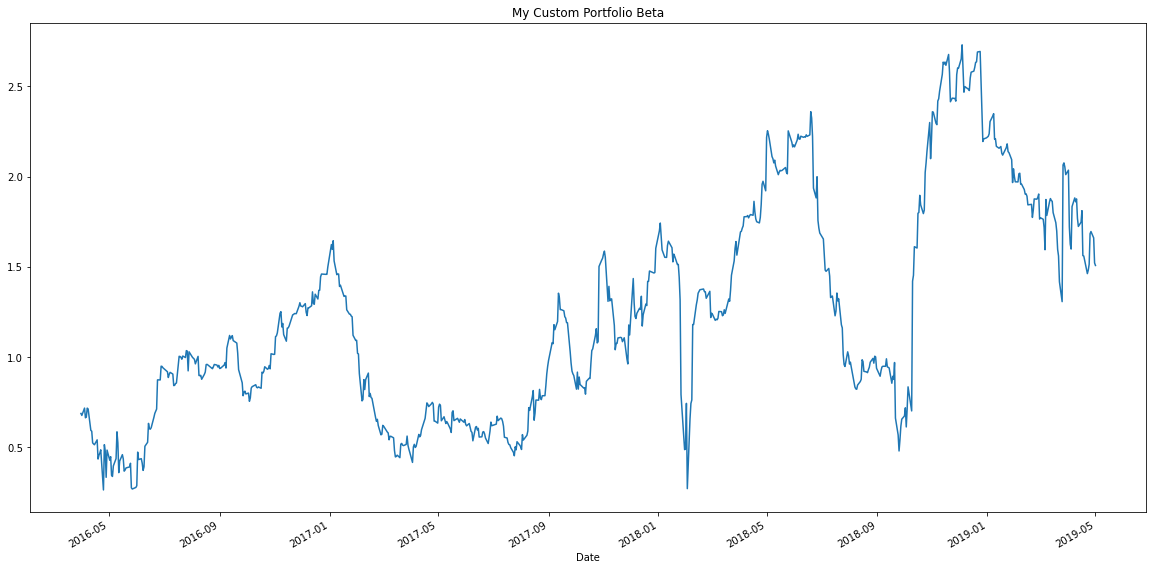

In [73]:
# Plot beta trend
beta2.plot(figsize = (20,10) , title = 'My Custom Portfolio Beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [69]:
# Calculate Annualized Sharpe Ratios
sharpe_ratios2 = final_portfolio.mean() * 252/ (final_portfolio.std() * np.sqrt(252))
sharpe_ratios2

my_portfolio                   1.171926
SOROS FUND MANAGEMENT LLC      0.355546
PAULSON & CO.INC.             -0.605629
TIGER GLOBAL MANAGEMENT LLC   -0.210963
BERKSHIRE HATHAWAY INC         0.567804
Algo 1                         1.345652
Algo 2                         0.653865
S&P TSX                        0.759414
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

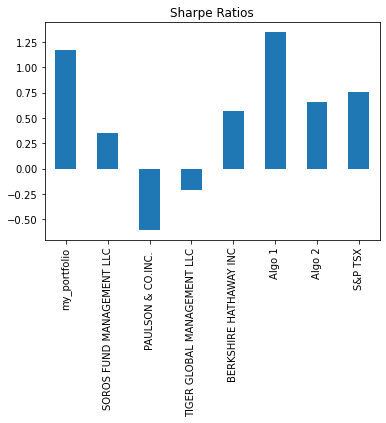

In [70]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios2.plot(kind = 'bar', title = 'Sharpe Ratios')

### How does your portfolio do?

Write your answer here!

My portfolio is performing OK, only trailing Algo 1, but beating all other portfolios.